In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
df = pd.read_csv('Input/DefaultCreditcardClients.csv')
df.rename(columns={'default payment next month':'default'}, inplace=True)
df.index = df.ID
if 'ID' in df:
    del df['ID']

pca_category= ['default']
pca_bill_amounts = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pca_pay_amounts = [ 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6']
pca_features =  ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6']

df_pca = df[pca_bill_amounts].astype(np.float64)
df_pca[pca_pay_amounts] = df[pca_pay_amounts].astype(np.float64)
np.round_(df_pca, decimals=0)

#Drop all less than 0 bill amounts the stupid way but it works
df_pca = df_pca.drop(df_pca[df_pca.BILL_AMT1 < 1.1].index)
df_pca = df_pca.drop(df_pca[df_pca.BILL_AMT2 < 1.1].index)
df_pca = df_pca.drop(df_pca[df_pca.BILL_AMT3 < 1.1].index)
df_pca = df_pca.drop(df_pca[df_pca.BILL_AMT4 < 1.1].index)
df_pca = df_pca.drop(df_pca[df_pca.BILL_AMT5 < 1.1].index)
df_pca = df_pca.drop(df_pca[df_pca.BILL_AMT6 < 1.1].index)

#Convert all 0 pay amounts to 1
df_pca[pca_pay_amounts] = df[pca_pay_amounts].replace({0:1})
df_pca2=df_pca[pca_features]
df_pca2=df_pca.apply(np.log)
df_pca2[pca_pay_amounts] = df_pca2[pca_pay_amounts].replace({0:.01})

## Exceptional Work

If the bill amount is equal or less than zero then the possibility of default is 0. Therefore it is safe to ignore the observations with =< 0 bill amount. (theres no current risk of default)

In [2]:
#python code

#Center means around 0 and scale the data so all std dev = 1.
#Transpose so sample in rows rather than columns so we use .T to transpose
scaled_data = preprocessing.scale(df_pca2.T)
#create a PCA object
pca=PCA()
#Calculate loading scores and variation each component accounts for
pca.fit(scaled_data)
#Generate Coords for the graph based on the loading scores and scaled data
pca_data=pca.transform(scaled_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


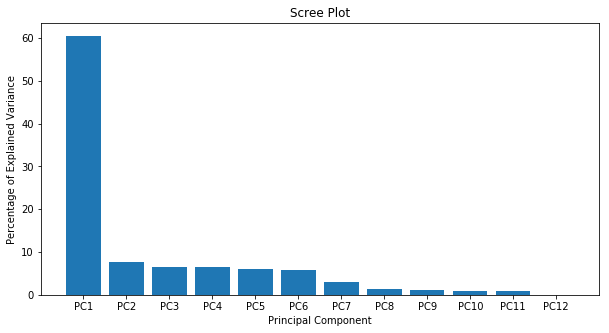

In [3]:
#Scree plot
plt.rcParams['figure.figsize'] = [10, 5]
#Calculate % that each comp accounts for
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
#Create labels
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
#Create matplotlib bar (scree) plot
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

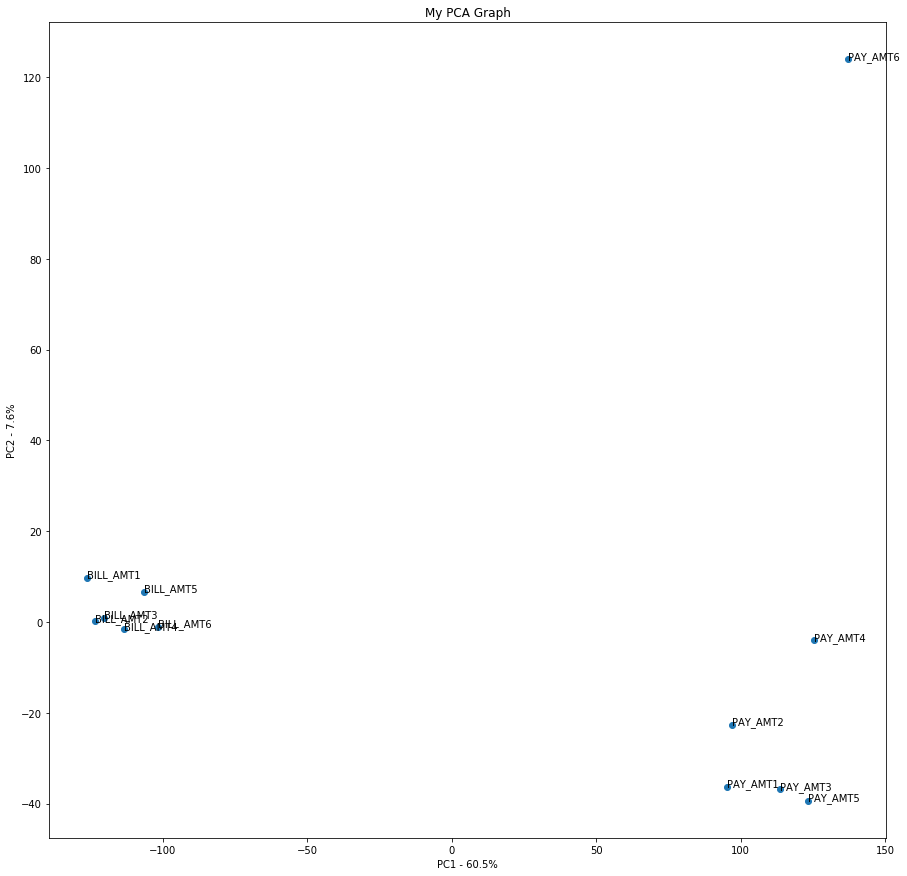

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]
pca_df = pd.DataFrame(pca_data,index = [*pca_features],columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

#add sample names to the graph
for sample in pca_df.index:
    #plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
    #plt.figure(figsize=(18, 16))
    plt.show
    

## Appendix

#### Jupyter Formatting Cheatsheet
https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed
    


In [5]:
# import numba.cuda
# import math
# my_gpu = numba.vectorize(df.AGE)
# print (my_gpu)